In [1]:
from ResearchMain import *

In [4]:
affix_info = all_df.loc[:, ['Period', 'River']]
df = pd.concat([overlying_water_env_df.copy(), sediment_env_df.iloc[:, :3]], axis=1)
# 调整列顺序，过滤掉不需要的数据
df = df[['W-TN', 'W-NO_{3}^{-}', 'W-NO_{2}^{-}', 'W-NH_{4}^{+}', 'W-COD', 'W-DO', 'W-pH', 'W-T', 'S-TN', 'S-TP']]
df

,W-TN,W-NO_{3}^{-},W-NO_{2}^{-},W-NH_{4}^{+},W-COD,W-pH,W-DO,W-T,S-TN,S-TP
ID,,,,,,,,,,
D-N1,8.5800,0.330000,0.2799,2.9800,16.67,8.10,10.66,11.3,705,806.285714
D-N2,8.7800,0.300000,0.0916,2.7400,16.53,8.00,10.02,12.5,320,794.285714
D-N3,8.4600,0.290000,0.1025,2.8300,15.84,8.10,10.58,14.7,420,791.000000
D-N4,8.0800,0.250000,0.2090,2.8100,16.41,7.84,10.62,13.8,650,768.000000
D-N5,8.3000,0.260000,0.1807,2.7900,15.92,7.90,11.06,13.6,1475,797.714286
...,...,...,...,...,...,...,...,...,...,...
W-H8,0.0211,0.051411,0.0000,2.6678,5.94,9.11,9.14,20.4,5325,956.571429
W-H9,0.0922,0.008870,0.0000,2.0855,6.92,8.79,8.82,22.6,5655,924.000000
W-H10,0.0780,0.030141,0.0000,2.3502,6.11,9.17,9.74,21.4,4060,901.142857


<Figure size 1800x1200 with 0 Axes>

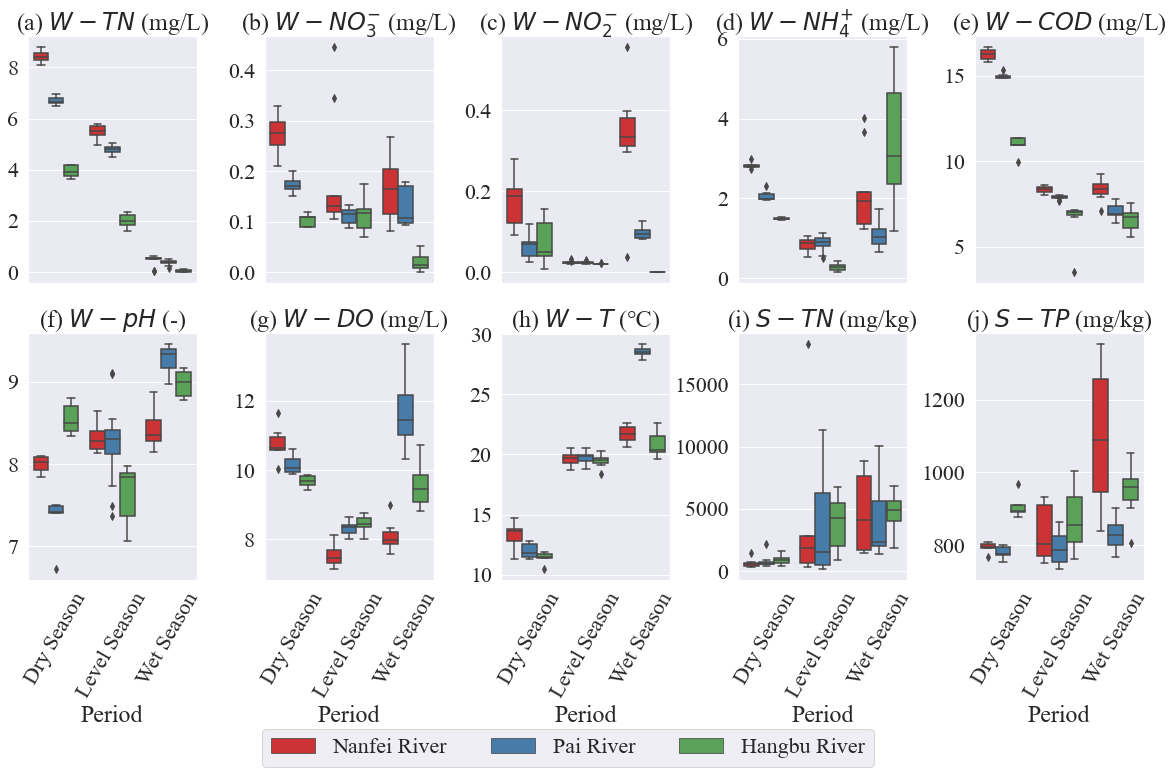

In [15]:
# 子图摆放设置
ROW_NUM = 2
COL_NUM = int(len(df.columns) / ROW_NUM)
# 绘图设置
sns.set(
    style='darkgrid',
    font='Times New Roman',
    font_scale=2
)
plt.figure(dpi=DPI)
# 布局设置
fig, ax_arr = plt.subplots(ROW_NUM, COL_NUM, sharex='col', figsize=(20, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
# 循环绘图
for index, s in enumerate(df.iteritems()):
    cur_df = pd.concat([s[1], affix_info], axis=1)
    # 计算行列数
    row_num = index // COL_NUM
    col_num = index - row_num * COL_NUM
    cur_ax = ax_arr[row_num][col_num]
    cur_plot = sns.boxplot(
        x="Period",
        y=s[0],
        hue="River",
        data=cur_df,
        dodge=True,
        palette="Set1",
        ax=cur_ax
    )
    # 子图图名、x轴、y轴、图例
    cur_ax.tick_params(axis='x', rotation=60)
    if len(df.columns) - (index + 1) >= COL_NUM:
        cur_plot.set_xlabel(None)
    cur_plot.set_title(f'({CHAR[index]}) ${s[0]}$ ({unit[s[0]]})')
    cur_ax.get_legend().remove()
    cur_plot.set_ylabel(None)

# 三个子图的图例相同，获取最后一个子图的图例
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='lower center',
           bbox_to_anchor=(0.5, -0.15))

# 保存图片
fig.savefig(EXPORT_PATH + '常规理化指标' + IMG_TYPE, dpi=DPI, bbox_inches='tight')